#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Файл с ЭКГ сигналом (ecg.csv) в папке

In [4]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.4 MB/s eta 0:00:00


In [6]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00


In [7]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
class Experiment:
  def __init__(self, signal):
    self.date = signal['date']
    self.path_signal = signal['signal']
    self.parameters = signal['parameters']
    self.sig = pd.read_csv(self.path_signal)['MLII']

  def get_date(self):
    return self.date

  def get_signal_length(self):
    return len(self.sig)

  def plot_signal(self, *sig):
    for i in sig:
      if type(i) == tuple:
        plt.plot(i[0], i[1])
      else:
        plt.plot(i)
    plt.show()

  def _signal_filtration(self):
    filtered = hp.filter_signal(self.sig, **self.parameters['filtration'])
    return filtered

  def _signal_find_peaks(self):
    filtered = self._signal_filtration()
    peaks, _ = find_peaks(filtered, **self.parameters['find_peaks'])
    return list(peaks)

  def _calculate_RR_intervals(self):
    filt_params = self.parameters['filtration']
    peaks_params = self.parameters['find_peaks']
    filt = self._signal_filtration()
    r_peaks = self._signal_find_peaks()
    rr_int = np.diff(r_peaks)/filt_params['sample_rate']
    return rr_int

  def get_RR_statistics(self):
    RR_int = self._calculate_RR_intervals()
    return {'mean': np.mean(RR_int), 'std': np.std(RR_int), 'min': min(RR_int), 'max': max(RR_int)}

In [26]:
ecg = Experiment({'date': '2023-01-05', \
                  'signal': '/content/drive/MyDrive/Colab Notebooks/программирование/ecg.csv', \
                  'parameters': {'filtration': {'cutoff': [0.75, 3.5], 'sample_rate': 100, 'order': 3, 'filtertype': 'bandpass'}, 'find_peaks': {'height': 20}}})

In [19]:
ecg.get_date()

'2023-01-05'

In [20]:
ecg.get_signal_length()

20000

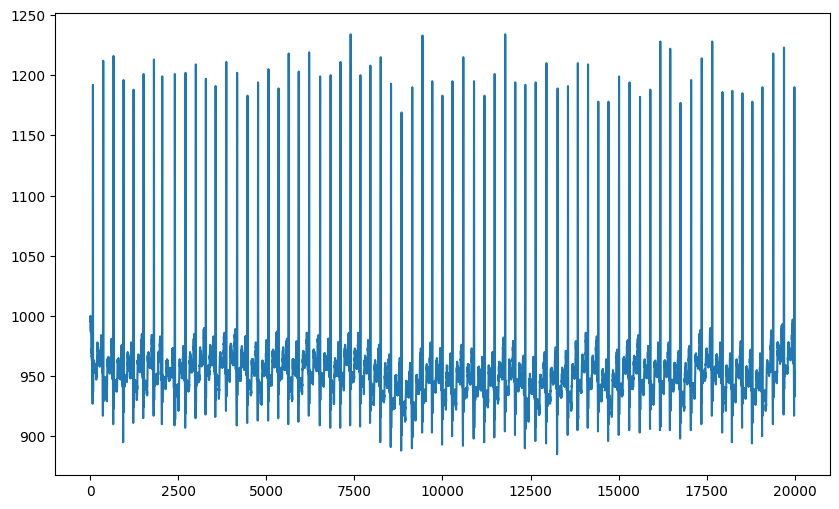

In [21]:
plt.figure(figsize=(10, 6))
ecg.plot_signal(ecg.sig)

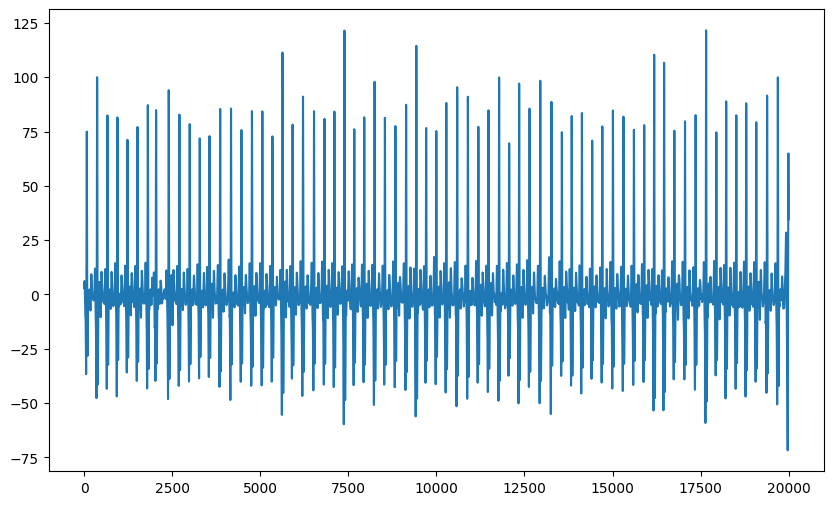

In [22]:
plt.figure(figsize=(10, 6))
filt = ecg._signal_filtration()
ecg.plot_signal(filt)

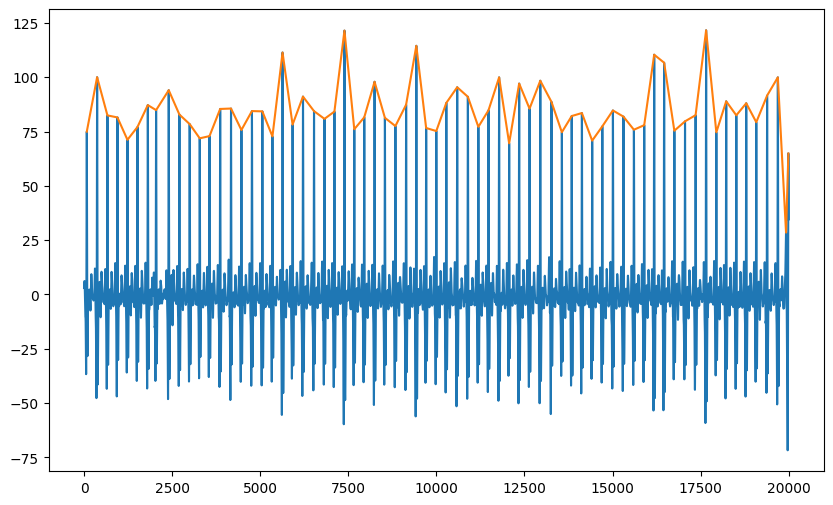

In [23]:
plt.figure(figsize=(10, 6))
peaks = ecg._signal_find_peaks()
ecg.plot_signal(filt, (peaks, filt[peaks]))

In [27]:
ecg._calculate_RR_intervals()

array([2.93, 2.93, 2.84, 2.84, 2.84, 2.94, 2.36, 3.58, 3.03, 2.92, 2.85,
       2.77, 3.03, 3.08, 2.95, 2.99, 2.95, 2.87, 2.87, 2.84, 2.96, 3.13,
       2.97, 2.82, 2.85, 2.79, 2.83, 2.93, 2.93, 2.98, 3.04, 2.9 , 2.79,
       2.88, 2.84, 3.09, 3.03, 2.98, 2.88, 3.01, 2.85, 2.84, 2.95, 3.05,
       3.17, 2.95, 2.8 , 2.89, 2.92, 2.88, 3.  , 2.99, 2.97, 2.93, 2.83,
       2.82, 2.9 , 3.03, 3.  , 2.99, 2.9 , 2.8 , 2.87, 2.82, 2.85, 3.07,
       3.05, 2.33, 0.66])

In [28]:
ecg.get_RR_statistics()

{'mean': 2.8862318840579713,
 'std': 0.3107732359789018,
 'min': 0.66,
 'max': 3.58}

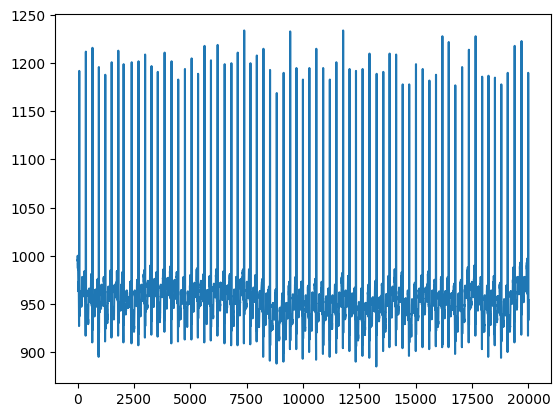

In [30]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/программирование/ecg.csv')
plt.plot(df['MLII'])
plt.show()

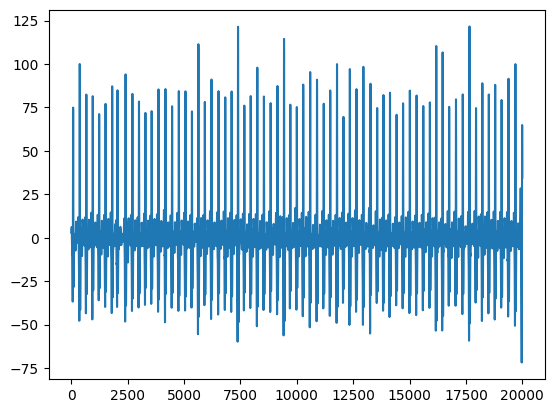

In [31]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

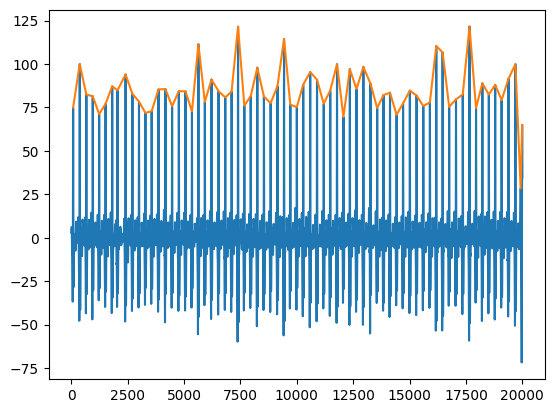

In [32]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks])
plt.show()

##Задача ** "Минигольф"

 в папке на githab